<H1>Pattern similarities</H1>

<P>We will compare similarities between the patterns in a network before (input) and after (output) the effect of inhibition.</P>

<P> If patterns of activity are less similar after inhibition, we will have pattern separation</P>

In [1]:
# load necessary modules
%pylab inline
import numpy as np
np.random.seed(0)

from scipy.stats import linregress

from inet.plots import plot_linear_fit
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


<H2>Definition of random pattern $\boldsymbol{z}$</H2>

<P>A memory random pattern $\boldsymbol{z}$ is the representation of the activity of all the neurons in the network. It is a vector of lenght n, being n the total number of neurons in the network.</P>

$\boldsymbol{z}_i: i = \{0, 1, \cdots, n\},$


<P>The i-th element of the pattern is an independent random variable of probability a to be one when the neuron is active,  and zero if not (1-a). </P>

\begin{equation}
    \Pr(\boldsymbol{z}_i) = 
        \begin{cases}
        1, & \text{if} \ \ \boldsymbol{z}_i < a,\\
        0, & \text{if} \ \ \boldsymbol{z}_i \geq 1-a\\
        \end{cases}
\end{equation}


In [2]:
def randpattern(size, prob):
    """
    Creates a pattern of activities (ones) with a given probability. 
    Activity is 1 if the cell is active, zero otherwise.
    
    Parameters
    ----------
    size : ndarray
           vector size
    prob : float
            probability of having ones
    """
    z = np.zeros(size)
    mysize = int(size*prob)

    z[np.random.choice(size, mysize)]=1
    
    return(z)

<H2>Vector norm</H2>

The most commonly encountered vector norm (often simply called "the norm" of a vector, or sometimes the magnitude of a vector) is the L2-norm, given by

\begin{equation}
\left\| \boldsymbol{z} \right\|_2 := \sqrt{z_1^2 + \cdots + z_n^2}.\end{equation}

In [3]:
z = randpattern(size=10, prob=0.5) # example for testing
z

array([ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.])

In [4]:
np.linalg.norm(z, ord=2) #norm2 of a vector

2.0

In [5]:
np.linalg.norm([1,1],2) # must be sqrt(2)

1.4142135623730951

<H2>Definition of similarity</H2>

It is the cosine of the normalized dot product of two vectors. It is equivalent to the Pearson correlation coefficient.

\begin{equation}
\text{similarity} = \cos(\theta) 
= {\mathbf{a} \cdot \mathbf{b} \over \|\mathbf{a}\|_2 \|\mathbf{b}\|_2} = \frac{ \sum\limits_{i=1}^{n}{a_i  b_i} }{ \sqrt{\sum\limits_{i=1}^{n}{a_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{b_i^2}} }    
\end{equation} 

In [6]:
def similarity(a, b):
    """
    Compute cosine similarity between samples in A and B.

    Cosine similarity, or the cosine kernel, computes similarity as the
    normalized dot product of A and B:

     K(a, b) = <a, b> / (||a||*||b||)

    Parameters
    ----------
    a : ndarray .

    b : ndarray.

    """
    # dot product is scalar product
    return np.dot( a/np.linalg.norm(a), b/np.linalg.norm(b))

In [7]:
sim = list()
for _ in range(1000):
    a = randpattern(100,.5)
    b = randpattern(100,.5)
    sim.append(similarity(a, b))

print(np.mean(sim)) # get this analytically!

0.396332751245


<H2>Pattern separation</H2>

It is the devation in the similarities between the input vectors and the output vectors. If both
input and output vectors have the same similarity, then the relationship between their similarities is
linear. Any positive deviation from the identity line when plotting similarities of input and output vectors will
be because the output pattner are less similar than the input patterns.

In [8]:
def plot_pattern_separation(inputpattern, outputpattern, ax = None):
    """
    input pattern: a list containing tuples of input patterns
    outputpattern: a list containing tuples of outputpatterns
    
    Computes the linear regression of the similarity between paired patterns
    and plot a line with the 95% confident intervals.
    
    Returns:
    
    pattern_completion: int
        0 if no pattern completion.
    """
    
    if ax is None:
        ax = plt.gca()
    
    yval = np.array([similarity(x,y) for x,y in inputpattern])
    xval = np.array([similarity(x,y) for x,y in outputpattern])
    
    xlin = np.linspace(0,1,100) # identity line
    
    ax.scatter(xval, yval, color='gray')
    
    ax.plot(xlin, xlin, '--', color='brown', alpha=.6)
    ax.set_xlim(0,1), 
    ax.set_ylim(0,1)
    ax.fill_between(xlin, 0, xlin, color='yellow', alpha=.1) # area of pattern comp.
    
    ax.set_xlabel('Input similarity  ($\cos(x_i,y_i)$)')
    ax.set_ylabel('Output similarity ($\cos(x_o,y_o)$)')
    
    slope = np.polyfit(xval,yval, 1)[0]
    print('Pattern separation is {:2.4f}'.format(1-slope))
    print(np.polyfit(xval,yval,1))
    return ax

In [9]:
# generate 100 input patterns of 30% and 50% activity
npatterns = 100
inputpattern  = [(randpattern(1000, .3), randpattern(1000,.5)) for _ in range(npatterns)]
len(inputpattern)

100

Pattern separation is -0.0000
[  1.00000000e+00   4.44089210e-17]


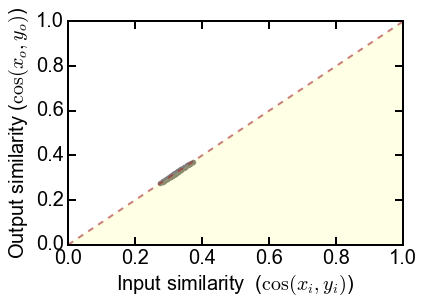

In [10]:
# there is no pattern separation of the inputs and outputs are the same
plot_pattern_separation(inputpattern, inputpattern) ;

In [11]:
# Output patterns will be generated by inhibiting from IN to GC
# generate 100 input patterns of 30% and 50% activity
I_network1 = randpattern(1000,.8) # 80% of neurons are active
I = I_network1
outpattern  = [(I*x, I*y) for x,y in inputpattern]

Pattern separation is 0.5231
[ 0.4768527   0.16386256]


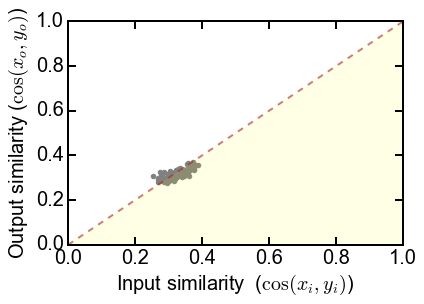

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
ax = plot_pattern_separation(inputpattern, outpattern)

Pattern separation is 0.5231
[ 0.4768527   0.16386256]
{'slope': 1.0575953538411862, 'intercept': -0.011995730163390839, 'P-value': 1.3022222143951411e-16, 'Standard error': 0.10591477015627639, 'correlation coef': 0.71015294356112457}


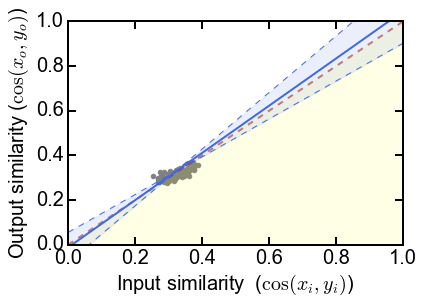

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax = plot_pattern_separation(inputpattern, outpattern) 
xdata = np.array([similarity(x,y) for x,y in inputpattern])
ydata = np.array([similarity(x,y) for x,y in outpattern])
ax = plot_linear_fit(xdata,ydata, color='royalblue')


A measure of pattern separation would be to see how much different is the slope of the linear fitted data, when 
compared with the unity line. A value >1 would mean that the output patters are more similar than the similar patterns,
wheres a value <1 would means that the output patterns are less similar than the similarity between input patterns. 

Thus, to evaluate pattern separation, we would subract 1 - slope

An alternative measurment would be the overlapping area between the lower triangule (proper pattern separation) and the 95% confident intervals obtained from the linear regression of the data.

In [15]:
slope, intercept, rvalue, pvalue, stder = linregress(xdata, ydata)
1 - slope # it does not work

-0.057595353841186192